<a href="https://colab.research.google.com/github/akash-singh-10/Deep-Learning/blob/main/DLA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

In [38]:
RANDOM_SEED = 2000
TEST_PCT = 0.3
LABELS = ["Normal","Fraud"]

In [39]:
df = pd.read_csv("creditcard.csv")
print(list(df.columns))

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [40]:
df.isnull().values.any()

False

In [41]:
len(df['Class'].unique())

2

In [42]:
pd.value_counts(df['Class'])

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

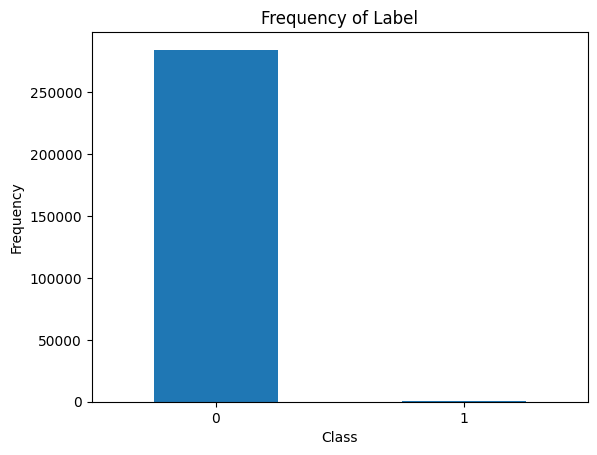

In [43]:
count_classes = pd.value_counts(df['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.xticks(range(len(df['Class'].unique())), df.Class.unique())
plt.title('Frequency of Label')
plt.xlabel('Class')
plt.ylabel('Frequency')

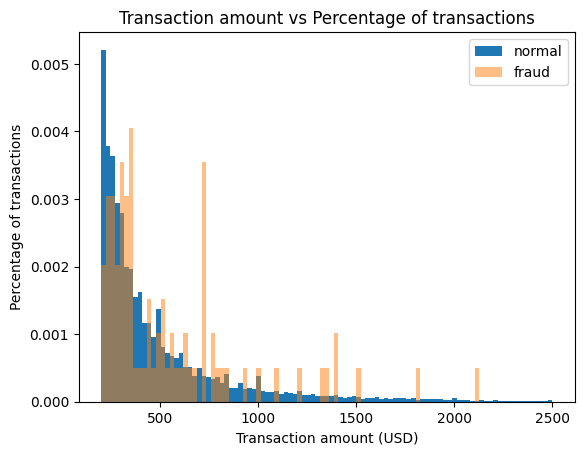

In [44]:
normal = df[df.Class == 0]
fraud = df[df.Class == 1]

bins = np.linspace(200, 2500, 100)
plt.hist(normal.Amount, bins = bins, alpha = 1, density = True, label='normal')
plt.hist(fraud.Amount, bins = bins, alpha = 0.5, density = True, label='fraud')
plt.legend(loc='upper right')
plt.title("Transaction amount vs Percentage of transactions")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions");
plt.show()

In [45]:
sc = StandardScaler()
df['Time'] = sc.fit_transform(df['Time'].values.reshape(-1,1))
df['Amount'] = sc.fit_transform(df['Amount'].values.reshape(-1,1))

In [46]:
x_train, x_test = train_test_split(df, test_size=0.3, random_state = 2021)
x_train = x_train[x_train.Class == 0]
x_train =   x_train.drop(['Class'], axis=1)
y_test = x_test['Class']
x_test = x_test.drop(['Class'], axis=1)
x_train = x_train.values
x_test = x_test.values

In [47]:
input_layer = tf.keras.layers.Input(shape = (x_train.shape[1],))

encoder = tf.keras.layers.Dense(14, activation='tanh', activity_regularizer=tf.keras.regularizers.l2(1e-7))(input_layer)
encoder = tf.keras.layers.Dense(7, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(4, activation='relu')(encoder)
decoder = tf.keras.layers.Dense(7, activation='relu')(encoder)
decoder = tf.keras.layers.Dense(14, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(x_train.shape[1], activation='tanh')(decoder)

autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_18 (Dense)            (None, 14)                434       
                                                                 
 dense_19 (Dense)            (None, 7)                 105       
                                                                 
 dense_20 (Dense)            (None, 4)                 32        
                                                                 
 dense_21 (Dense)            (None, 7)                 35        
                                                                 
 dense_22 (Dense)            (None, 14)                112       
                                                                 
 dense_23 (Dense)            (None, 30)                450 

In [48]:
autoencoder.compile(metrics=['accuracy'], loss='mean_squared_error',optimizer='adam')

In [49]:
h = autoencoder.fit(x_train, x_train, epochs=50, batch_size=64, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
3110/3110 [==============================] - 13s 4ms/step - loss: 0.7956 - accuracy: 0.3682 - val_loss: 0.7541 - val_accuracy: 0.4146
Epoch 2/50
3110/3110 [==============================] - 12s 4ms/step - loss: 0.7054 - accuracy: 0.4064 - val_loss: 0.7283 - val_accuracy: 0.4115
Epoch 3/50
3110/3110 [==============================] - 17s 6ms/step - loss: 0.6881 - accuracy: 0.4108 - val_loss: 0.7150 - val_accuracy: 0.4131
Epoch 4/50
3110/3110 [==============================] - 17s 6ms/step - loss: 0.6787 - accuracy: 0.4157 - val_loss: 0.7086 - val_accuracy: 0.4232
Epoch 5/50
3110/3110 [==============================] - 23s 8ms/step - loss: 0.6731 - accuracy: 0.4197 - val_loss: 0.7040 - val_accuracy: 0.4222
Epoch 6/50
3110/3110 [==============================] - 17s 6ms/step - loss: 0.6687 - accuracy: 0.4232 - val_loss: 0.6997 - val_accuracy: 0.4265
Epoch 7/50
3110/3110 [==============================] - 16s 5ms/step - loss: 0.6652 - accuracy: 0.4255 - val_loss: 0.6958 - val_ac

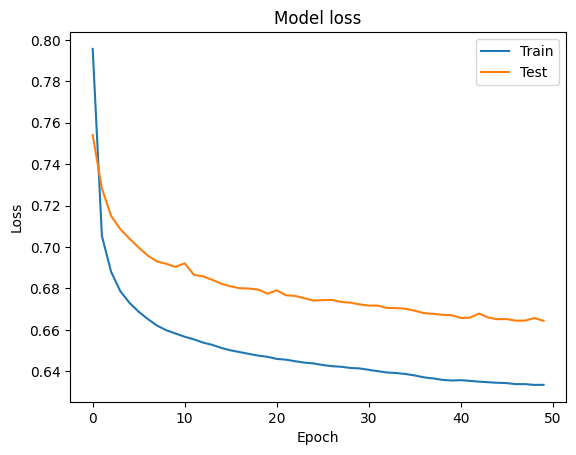

In [50]:
plt.plot(h.history['loss'], label='Train')
plt.plot(h.history['val_loss'],label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

In [51]:
pred = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test-pred,2), axis=1)
error_df=pd.DataFrame({'reconstruction_error': mse, 'True_Class':y_test})
error_df.describe()

2671/2671 [==============================] - 4s 2ms/step


,reconstruction_error,True_Class
count,85443.000000,85443.000000
mean,0.664345,0.001662
std,3.524097,0.040733
min,0.024416,0.000000
25%,0.169402,0.000000
50%,0.279727,0.000000
75%,0.505007,0.000000
max,295.998231,1.000000


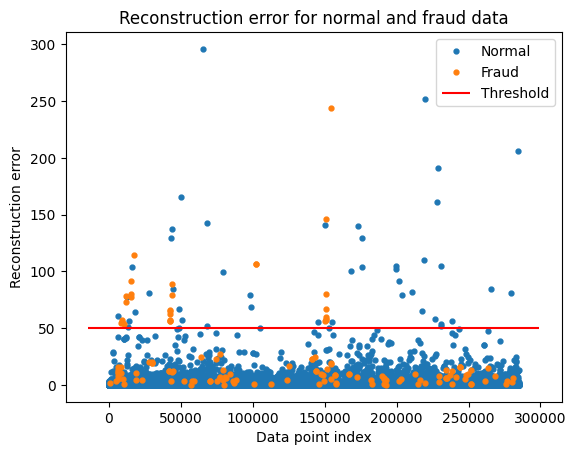

In [52]:
threshold_fixed = 50
groups = error_df.groupby('True_Class')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for normal and fraud data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

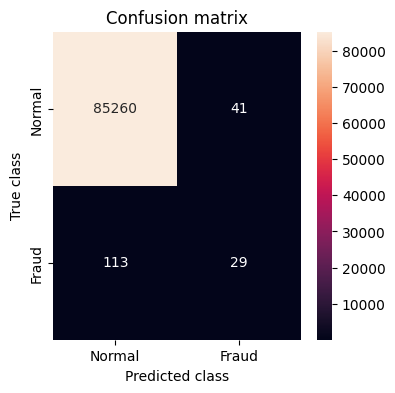

 Accuracy:  0.9981976288285758
 Recall:  0.20422535211267606
 Precision:  0.4142857142857143


In [53]:
import seaborn as sns
threshold_fixed =52
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.True_Class, pred_y)
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df['True_Class'], error_df['pred']))
print(" Recall: ",recall_score(error_df['True_Class'], error_df['pred']))
print(" Precision: ",precision_score(error_df['True_Class'], error_df['pred']))